In [ ]:
hdu_list.close()

In [ ]:
#Work with fts files http://eso-python.github.io/ESOPythonTutorials/FITS-images.html
#Rotate matrix https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html

In [2]:
import pyfits
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import os
import datetime
from scipy import ndimage, misc
from astropy.utils.data import download_file
from astropy.modeling.rotations import Rotation2D
from astropy.io import fits
from datetime import datetime
%matplotlib inline

In [3]:
directory = '../2016_june/2010_December'
files = os.listdir(directory)
k = len(files)
for i in range(k):
    files[i] = directory + '/' + files[i] 
    
hdu_list = fits.open(files[0])  
for i in range(k):
    hdu_list2 = fits.open(files[i])  
    hdu_list.append(hdu_list2[0])

In [10]:
DATE_OBS_str = np.array(range(0, k), dtype = 'object')
DATE_OBS = np.array(range(0, k), dtype = 'object')
day_obs = np.array(range(0, k), int)
SOLAR_P0 = np.array(range(0, k), float)
SOLAR_R = np.array(range(0, k), float)

for i in range(0, k):
    DATE_OBS_str[i] = hdu_list[i+1].header['DATE-OBS']
    SOLAR_P0[i] = hdu_list[i+1].header['SOLAR_P0']
    SOLAR_R[i] = hdu_list[i+1].header['SOLAR_R']

In [34]:
#DATA AND TIME EXTRACT FROM STRING LIST
#format input data 2016-06-10T10:42:07
def time_extract(datas):
    s = datas
    l = len(s)
    integ = []
    i = 0
    while i < l:
        s_int = ''
        a = s[i]
        while '0' <= a <= '9':
            s_int += a
            i += 1
            if i < l:
                a = s[i]
            else:
                break
        i += 1
        if s_int != '':
            integ.append(int(s_int))
    return integ

for i in range(0, k):
    DATE_OBS[i] = time_extract(DATE_OBS_str[i])
    day_obs[i] = DATE_OBS[i][2] #Day obs for ploting

#time in sec to calculate angulat velocity 12 elements
time_sec = np.array(range(0, k), int) 
#delta time in sec to calculate angulat velocity 12 - 1 elements
delta_time_sec = np.array(range(0, k-1), int) 

#time in sec. Sum
for i in range(0, k):
    time_sec[i] = DATE_OBS[i][5] + DATE_OBS[i][4]*60 + DATE_OBS[i][3]*60*60 + DATE_OBS[i][2]*60*60*24

for i in range(0, k-1): 
    delta_time_sec[i]= time_sec[i+1] - time_sec[i]
    
DATE_OBS

array([list([2010, 12, 4, 13, 39, 1]), list([2010, 12, 5, 11, 11, 28]),
       list([2010, 12, 6, 9, 36, 6]), list([2010, 12, 7, 12, 55, 45]),
       list([2010, 12, 8, 8, 14, 41]), list([2010, 12, 9, 13, 12, 11]),
       list([2010, 12, 10, 11, 2, 20]), list([2010, 12, 11, 10, 8, 20])],
      dtype=object)

In [14]:
#choose number of file
#ploting images and saving to .png files
for i in range(0, k):
    im1 = hdu_list[i+1].data
    im1 = np.flipud(im1)
    #rotate matrix by angel SOLAR_P0
    im1_rot = ndimage.rotate(im1, -SOLAR_P0[i], reshape=False)
    print(i, end='')
    #print('DATE_OBS =', DATE_OBS[i])
    #print('SOLAR_R =', SOLAR_R[i])
    #print('SOLAR_P0 =', SOLAR_P0[i])
    
    plt.imshow(im1_rot)
    plt.colorbar();
    plt.savefig("Graph_dec2010_" + str(i+1) +".png", format="PNG")
    #plt.show()
    plt.close()
print('done!')

01234567done!


In [23]:
#reading the coordinates y and z of one sunspot (in pixel) from file
file_txt = open("spot_dec.txt")
line = file_txt.read().splitlines()
y_pix_june = np.array(range(0, k), int)
z_pix_june = np.array(range(0, k), int)

for i in range(k):
    line[i] = line[i].split(' ')
for i in range(k):
    y_pix_june[i] = line[i][1]
    z_pix_june[i] = line[i][2]

In [24]:
y_pix_june

array([ 406,  523,  667,  864, 1000, 1216, 1366, 1508])

In [25]:
z_pix_june

array([1480, 1488, 1501, 1514, 1522, 1541, 1551, 1556])

In [26]:
#---STEP2, STEP3----
center_sun_y = 1024 #pix
center_sun_z = 1024 #pix

y_cor = np.array(range(0, k), int)
z_cor = np.array(range(0, k), int)
x_cor = np.array(range(0, k), float)

theta = np.array(range(0, k), float)
lat_B = np.array(range(0, k), float)
lon_fi = np.array(range(0, k), float)

rad_to_grad = 180/ math.pi 

for i in range(k):
    y_cor[i] = y_pix_june[i] - center_sun_y
    z_cor[i] = z_pix_june[i] - center_sun_z
    x_cor[i] = math.sqrt(SOLAR_R[i]**2 - y_cor[i]**2 - z_cor[i]**2)
    theta[i] = math.acos(z_cor[i]/(SOLAR_R[i]))
    lat_B[i] = 90 - theta[i] * rad_to_grad
    lon_fi[i] = math.atan2(y_cor[i], x_cor[i]) * rad_to_grad

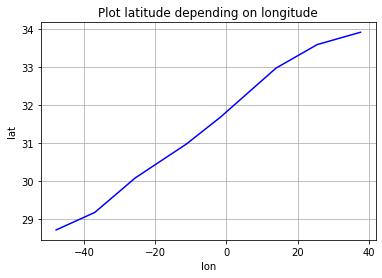

In [27]:
#ploting the coordinates
plt.title('Plot latitude depending on longitude')
plt.xlabel('lon')
plt.ylabel('lat')
plt.plot(lon_fi, lat_B, color = 'blue')  
plt.grid(True)
plt.show()

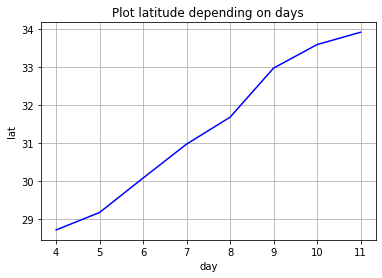

In [28]:
#ploting the coordinates
plt.title('Plot latitude depending on days')
plt.xlabel('day')
plt.ylabel('lat')
plt.plot(day_obs, lat_B, color = 'blue') 
plt.grid(True)
plt.show()

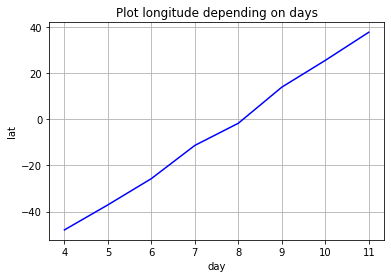

In [29]:
#ploting the coordinates
plt.title('Plot longitude depending on days')
plt.xlabel('day')
plt.ylabel('lat')
plt.plot(day_obs, lon_fi, color = 'blue') 
plt.grid(True)
plt.show()

In [30]:
#----Step 4----
#Determine the angular velocity of solar 
#rotation per day using the obtained 
#longitude and taking into account the time between images. 

to_sec = 60*60*24

V_angular = np.array(range(0, k-1), float)
delta_lon_fi = np.array(range(0, k), float)

for i in range(k-1):
    delta_lon_fi[i] = lon_fi[i+1] - lon_fi[i]

print('Angular velocity grad per day')
for i in range(k-1):
    V_angular[i] = delta_lon_fi[i]/delta_time_sec[i]
    print('{0:.3f}'.format(V_angular[i]*to_sec))
    
V_angular_mean = np.mean(V_angular)*to_sec
print('V_angular_mean =', V_angular_mean, 'grad/day')

Angular velocity grad per day
12.096
12.178
12.631
11.924
12.966
12.743
12.658
V_angular_mean = 12.456635446525134 grad/day


In [31]:
#---Step 5---  Determine the sidereal rotation rate using the following relations: 
P_synod = np.zeros(k-1)
P_sid = np.zeros(k-1)

P_synod = 360/(V_angular*to_sec)
P_earth = 365.2564

P_sid = P_synod * P_earth /(P_earth + P_synod)

#Siderial rotation rate is

Omega_sid = 360/P_sid
Omega_sid

array([13.08114191, 13.16362487, 13.61707682, 12.90914037, 13.95195581,
       13.7288282 , 13.64394323])

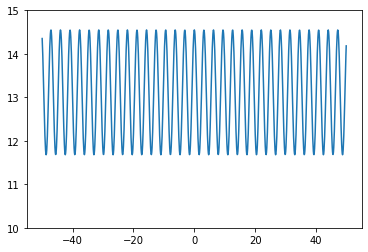

In [32]:
#--Step 6 Compare the obtained angular sidereal 
#rotation rate with the functional form of solar 
#differential rotation obtained from statistical studie

a = 14.55
b = -2.87

B = np.arange(-50,50,0.1)
Omega_sid_teor = np.zeros(len(B))

for i in range(len(B)):
    Omega_sid_teor[i] = a + b * ((math.sin(B[i]))**2)

plt.axis([-55, 55, 10, 15])  # [xmin, xmax, ymin, ymax]
plt.plot(B, Omega_sid_teor)

In [33]:
len(B)

1000